# Biotin porduction in E. coli K12

## 1. Introduction

### 1.1 Literature review of the compound (<500 words)

The newe text that we can add here + 1
Hello this is just a test 

### 1.2 Literature review of the cell factory (<500 words)

•	General advantages

1.	Low energy requirements

2.	Increased output

3.	Shorter lead time

4.	Consistent quality and purity of the product

5.	Sustainability of product production

6.	Potentail customization of production

•	General disadvantages

1.	Difficulties in maintaining in vitro cells in particular conditions

2.	Sometimes the process is not profitable

3.	Complexity in establishing the proper proces

4.	Regulatory difficulties with related strains and its modifications

•	Suitability of the cell factory for the product

The traditional method of biotin production involves chemical synthesis, which is energy-intensive and environmentally hazardous .
In contrast, microbial cell factories offer a sustainable and eco-friendly alternative for biotin production.
They are engineered microbes that can produce biotin in closed bioreactors with high efficiency, specificity, and low energy requirements .
The use of cell factories for biotin production has several advantages over traditional methods.
Firstly, it is a green and sustainable process that reduces the environmental impact of biotin production.
Secondly, it offers higher productivity and improved quality control compared to chemical synthesis methods.
Thirdly, it provides greater flexibility in terms of product customization and optimization.
Finally, it is a cost-effective approach that reduces the overall production cost of biotin.


## 2. Problem definition (<300 words)

## 3. *If Project category I:* Reconstruction of a new GSM for your cell factory host of interest (<1500 words)

or

## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words)

## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project; <500 words for Category I project)

Import needed libreries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from cobra.io import read_sbml_model
plt.style.use('seaborn')
%matplotlib inline

C:\Users\vfier\AppData\Local\Temp\ipykernel_31440\281768124.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Read the model 

In [2]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/iML1515.xml')

Defining objective function with our target reaction

In [10]:
from cobra import Reaction, Metabolite

for reaction in model.reactions.query('Dethiobiotin', 'name'):
    print(reaction.name, reaction.id)


Dethiobiotin synthase DBTS


In [39]:
model.reactions.BTS5

Reaction identifier,BTS5
Name,Biotin synthase
Memory address,0x1d3f86c2990
Stoichiometry,2fe2s_c + amet_c + dtbt_c --> 2fe1s_c + btn_c + dad_5_c + h_c + met__L_c [2Fe-2S] iron-sulfur cluster + S-Adenosyl-L-methionine + Dethiobiotin --> [2Fe-1S] desulfurated iron-sulfur cluster + Biotin + 5'-Deoxyadenosine + H+ + L-Methionine
GPR,b0775
Lower bound,0.0
Upper bound,1000


In [15]:
# model.objective = model.reactions.BTS5                                                                                                                                                                                                                                                                                                                                               # BIOMASS_Ec_iML1515_core_75p37M (substitute to this to go back to BIOMASS optimization)
# solution = model.optimize()
# print(solution)

with model:
    model.objective = model.reactions.DBTS
    sol = model.optimize()
    print(sol.objective_value)

1.7539944288539561e-06


In [16]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction BIOMASS_Ec_iML1515_core_75p37M at 0x25a30d19310>: 1.0}

In [17]:
model.optimize()

,fluxes,reduced_costs
CYTDK2,0.00000,1.721913e-17
XPPT,0.00000,2.775558e-17
HXPRT,0.00000,-1.504671e-02
NDPK5,0.00000,-0.000000e+00
SHK3Dr,0.33424,4.631431e-17
...,...,...
MPTS,0.00000,3.556183e-17
MOCOS,0.00000,-5.642514e-03
BMOGDS2,0.00000,-3.338488e-01
FESD2s,0.00000,1.127570e-17


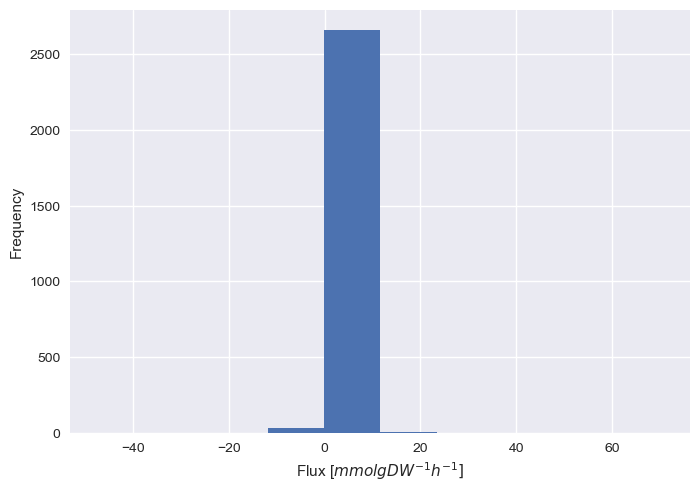

In [20]:
fig = sol.fluxes.hist()
fig.set_xlabel('Flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [19]:
sol.fluxes.BTS5

1.7539944288539561e-06

In [43]:
for reaction in model.reactions.query('Biotin', 'name'):
    print(reaction.name, reaction.id)

Biotin exchange EX_btn_e
Biotin sulfoxide reductase BSORy
Biotin sulfoxide reductase BSORx
Biotin synthase BTS5
Biotin transport via proton symport (periplasm) BTNt2ipp
Biotin transport via diffusion (extracellular to periplasm) BTNtex


In [55]:
model.reactions.BSORx

Reaction identifier,BSORx
Name,Biotin sulfoxide reductase
Memory address,0x261182ca710
Stoichiometry,btnso_c + h_c + nadh_c --> btn_c + h2o_c + nad_c D-biotin d-sulfoxide + H+ + Nicotinamide adenine dinucleotide - reduced --> Biotin + H2O H2O + Nicotinamide adenine dinucleotide
GPR,b3551
Lower bound,0.0
Upper bound,1000.0


In [59]:
model.reactions.BSORy.gene_name_reaction_rule
model.reactions.BSORx.gene_name_reaction_rule          # same gene does forward and reverse reactions

'bisC'

In [67]:
essentiallity = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiallity[gene] = model.slim_optimize(error_value = 0.)

In [72]:
essentiallity

{<Gene b2551 at 0x261178d9610>: 5.480936276188895e-22,
 <Gene b0870 at 0x2611788a1d0>: 5.480936276188895e-22,
 <Gene b3368 at 0x261178daa50>: 5.480936276188895e-22,
 <Gene b2436 at 0x261178daf90>: 5.480936276188895e-22,
 <Gene b0008 at 0x261178db550>: 5.480936276188895e-22,
 <Gene b3500 at 0x261178d99d0>: 5.480936276188895e-22,
 <Gene b2465 at 0x261178ec090>: 5.480936276188895e-22,
 <Gene b0945 at 0x261178ec710>: 5.480936276188895e-22,
 <Gene b4467 at 0x261178ecd10>: 5.480936276188895e-22,
 <Gene b3126 at 0x261178ed2d0>: 5.480936276188895e-22,
 <Gene b4468 at 0x261178ec0d0>: 5.480936276188895e-22,
 <Gene b2979 at 0x261178ede90>: 5.480936276188895e-22,
 <Gene b3916 at 0x261178ee490>: 5.480936276188895e-22,
 <Gene b1095 at 0x261178eead0>: 5.480936276188895e-22,
 <Gene b1054 at 0x261178ef110>: 5.480936276188895e-22,
 <Gene b1855 at 0x261178ef6d0>: 5.480936276188895e-22,
 <Gene b1260 at 0x261178efd50>: 5.480936276188895e-22,
 <Gene b2378 at 0x261178f03d0>: 5.480936276188895e-22,
 <Gene b01

In [77]:
model.metabolites.btn_c.summary()

Percent,Flux,Reaction,Definition
100.00%,2.477E-07,BTS5,2fe2s_c + amet_c + dtbt_c --> 2fe1s_c + btn_c + dad_5_c + h_c + met__L_c
Percent,Flux,Reaction,Definition
100.00%,-2.477E-07,BIOMASS_Ec_iML1515_core_75p37M,0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 70.028756 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.019456 kdo2lipid4_e + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 7e-06 mobd_c + 0.013894 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.013013 nh4_c + 0.000323 ni2_c + 0.063814 pe160_p + 0.075214 pe161_p + 0.185265 phe__L_c + 0.000223 pheme_c + 0.221055 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.215792 ser__L_c + 0.000223 sheme_c + 0.004338 so4_c + 9.8e-05 succoa_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.253687 thr__L_c + 0.056843 trp__L_c + 0.137896 tyr__L_c + 5.5e-05 udcpdp_c + 0.144104 utp_c + 0.423162 val__L_c + 0.000341 zn2_c --> 75.37723 adp_c + 75.37723 h_c + 75.37323 pi_c + 0.773903 ppi_c


## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References